In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font",family ='SimHei')

In [3]:
df=pd.read_csv('douyin.txt')
df.head()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,device,time,duration_time
0,18068,138,1312559,27947,23,0,1,0,-1,13717,3085992215,10
1,3456,-1,920393,36070,-1,1,0,0,-1,6895,3082715571,10
2,17128,-1,1201256,14657,11,1,1,0,-1,61358,3084094150,41
3,1368,81,2720842,26944,68,0,0,0,-1,1466,3086505995,10
4,15692,109,691661,18212,213,0,0,0,11513,540,3087035710,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886702 entries, 0 to 5886701
Data columns (total 12 columns):
 #   Column         Dtype
---  ------         -----
 0   uid            int64
 1   user_city      int64
 2   item_id        int64
 3   author_id      int64
 4   item_city      int64
 5   channel        int64
 6   finish         int64
 7   like           int64
 8   music_id       int64
 9   device         int64
 10  time           int64
 11  duration_time  int64
dtypes: int64(12)
memory usage: 538.9 MB


In [6]:
df.shape

(5886702, 12)

In [7]:
# =====================处理=========================

In [8]:
# 1 设备id这一列对数据分析无关，可以删除
df.drop(columns='device',inplace=True)
df.head()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,time,duration_time
0,18068,138,1312559,27947,23,0,1,0,-1,3085992215,10
1,3456,-1,920393,36070,-1,1,0,0,-1,3082715571,10
2,17128,-1,1201256,14657,11,1,1,0,-1,3084094150,41
3,1368,81,2720842,26944,68,0,0,0,-1,3086505995,10
4,15692,109,691661,18212,213,0,0,0,11513,3087035710,10


In [9]:
# 2 查看是否存在空值
df.isnull().sum(axis=0)

uid              0
user_city        0
item_id          0
author_id        0
item_city        0
channel          0
finish           0
like             0
music_id         0
time             0
duration_time    0
dtype: int64

In [10]:
# 3 查看是否存在重复值
df.duplicated().sum()

4968

In [11]:
# 4 删除重复值，对重复数值保留第一行数据
df.drop_duplicates(keep='first',inplace=True)

In [12]:
# 5 重新设置索引
df.reset_index(drop=True,inplace=True)

In [8]:
import time

real_time = []
for i in df['time']:
    timeArray = time.localtime(i)
    otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    real_time.append(otherStyleTime)    
df['real_time'] = real_time

In [11]:
df['real_time'] = pd.to_datetime(df['real_time']) # 这样才能转换成日期格式

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886702 entries, 0 to 5886701
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   uid            int64         
 1   user_city      int64         
 2   item_id        int64         
 3   author_id      int64         
 4   item_city      int64         
 5   channel        int64         
 6   finish         int64         
 7   like           int64         
 8   music_id       int64         
 9   device         int64         
 10  duration_time  int64         
 11  real_time      datetime64[ns]
dtypes: datetime64[ns](1), int64(11)
memory usage: 538.9 MB


In [59]:
# 6 time为时间轴，需要转化为实际日期(两者差别？？？)
df['time']=pd.to_datetime(df['time'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737313 entries, 0 to 1737312
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   uid            int64         
 1   user_city      float64       
 2   item_id        int64         
 3   author_id      int64         
 4   item_city      float64       
 5   channel        int64         
 6   finish         int64         
 7   like           int64         
 8   music_id       float64       
 9   time           datetime64[ns]
 10  duration_time  int64         
 11  hour           int32         
 12  date           object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(7), object(1)
memory usage: 165.7+ MB


In [14]:
# 7 数据是进行过脱敏的数据，无法观察原有情况，不过可以推断其中的-1是缺失值直接删除即可。
df.replace(to_replace=-1,value=np.nan,inplace=True)
df.dropna(axis=0,inplace=True)

In [15]:
# 8 再次重新设置索引
df.reset_index(drop=True,inplace=True)
df.head()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,time,duration_time
0,15692,109.0,691661,18212,213.0,0,0,0,11513.0,2067-10-28 13:55:10,10
1,44071,80.0,1243212,34500,68.0,0,0,0,1274.0,2067-10-21 14:27:03,9
2,10902,202.0,3845855,634066,113.0,0,0,0,762.0,2067-10-25 16:38:51,10
3,25300,21.0,3929579,214923,330.0,0,0,0,2332.0,2067-10-25 12:36:25,15
4,3656,138.0,2572269,182680,80.0,0,0,0,238.0,2067-10-21 12:46:29,9


In [16]:
# 9 将time列中的日期，拆分
df['hour']=df['time'].dt.hour
df['date']=df['time'].dt.date
df.head()
#这里没有问题啊

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,time,duration_time,hour,date
0,15692,109.0,691661,18212,213.0,0,0,0,11513.0,2067-10-28 13:55:10,10,13,2067-10-28
1,44071,80.0,1243212,34500,68.0,0,0,0,1274.0,2067-10-21 14:27:03,9,14,2067-10-21
2,10902,202.0,3845855,634066,113.0,0,0,0,762.0,2067-10-25 16:38:51,10,16,2067-10-25
3,25300,21.0,3929579,214923,330.0,0,0,0,2332.0,2067-10-25 12:36:25,15,12,2067-10-25
4,3656,138.0,2572269,182680,80.0,0,0,0,238.0,2067-10-21 12:46:29,9,12,2067-10-21


In [17]:
df.describe()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,time,duration_time,hour
count,1.737313e+06,1.737313e+06,1.737313e+06,1.737313e+06,1.737313e+06,1.737313e+06,1.737313e+06,1.737313e+06,1.737313e+06,1737313,1.737313e+06,1.737313e+06
mean,2.075673e+04,1.149420e+02,9.008225e+05,1.078839e+05,9.137190e+01,4.602855e-02,4.009456e-01,9.654564e-03,4.567824e+03,2067-10-20 00:57:29.876982784,1.116573e+01,1.428035e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2067-02-21 01:38:40,0.000000e+00,0.000000e+00
25%,5.875000e+03,4.600000e+01,6.299500e+04,9.740000e+03,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.320000e+02,2067-10-16 02:12:50,9.000000e+00,1.100000e+01
50%,1.556800e+04,9.900000e+01,5.361870e+05,3.670000e+04,6.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.039000e+03,2067-10-22 18:28:56,1.000000e+01,1.500000e+01
75%,3.334900e+04,1.670000e+02,1.246897e+06,1.248510e+05,1.370000e+02,0.000000e+00,1.000000e+00,0.000000e+00,3.960000e+03,2067-10-25 23:21:26,1.000000e+01,1.900000e+01
max,7.071000e+04,3.930000e+02,4.122678e+06,8.503070e+05,4.600000e+02,4.000000e+00,1.000000e+00,1.000000e+00,8.977600e+04,2067-10-30 03:11:14,6.400000e+02,2.300000e+01
std,1.707054e+04,8.433359e+01,1.093154e+06,1.657124e+05,8.031036e+01,3.717563e-01,4.900902e-01,9.778220e-02,9.818738e+03,NaN,7.006027e+00,5.998792e+00


In [18]:
# 10 time中存在有异常偏差的数据，即2067-02-21，需将该条数据删除
df.drop(labels=df.loc[df.date == '2067-02-21'].index,inplace=True)
df.head()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,time,duration_time,hour,date
0,15692,109.0,691661,18212,213.0,0,0,0,11513.0,2067-10-28 13:55:10,10,13,2067-10-28
1,44071,80.0,1243212,34500,68.0,0,0,0,1274.0,2067-10-21 14:27:03,9,14,2067-10-21
2,10902,202.0,3845855,634066,113.0,0,0,0,762.0,2067-10-25 16:38:51,10,16,2067-10-25
3,25300,21.0,3929579,214923,330.0,0,0,0,2332.0,2067-10-25 12:36:25,15,12,2067-10-25
4,3656,138.0,2572269,182680,80.0,0,0,0,238.0,2067-10-21 12:46:29,9,12,2067-10-21


In [19]:
# =====================分析=========================

In [20]:
'''
1.抖音98.52%的流量都会流向算法推荐视频，获得算法推荐是获得更多播放的关键所在。
2.最重要的始终是题材的选择，初始流量池大更容易获得算法青睐。
3.除去题材外，投稿的最佳时间日常是在0-5点，有平台活动一定要参与。
4.视频时长最好在7-10s，其次是0-6s及23s以内，最长也不建议超过40s。
5.背景音乐最好选择当下最流行的歌曲。
'''

'\n1.抖音98.52%的流量都会流向算法推荐视频，获得算法推荐是获得更多播放的关键所在。\n2.最重要的始终是题材的选择，初始流量池大更容易获得算法青睐。\n3.除去题材外，投稿的最佳时间日常是在0-5点，有平台活动一定要参与。\n4.视频时长最好在7-10s，其次是0-6s及23s以内，最长也不建议超过40s。\n5.背景音乐最好选择当下最流行的歌曲。\n'

In [21]:
'''
抖音网红视频数据分析
    抖音播放量来源分布
    视频时长与点赞完播率之间的关系
        作品时长与播放量的关系
        作品时长与作品数量的关系
        作品时长与完播率的关系
        作品时长与点赞率的关系
背景音乐与点赞完播率之间的关系
    热门的音乐ID
    热门的歌曲点赞率与完播率
    热门的歌曲点赞率与完播率随时间变化的曲线
抖音播放量来源分布

'''

'\n抖音网红视频数据分析\n    抖音播放量来源分布\n    视频时长与点赞完播率之间的关系\n        作品时长与播放量的关系\n        作品时长与作品数量的关系\n        作品时长与完播率的关系\n        作品时长与点赞率的关系\n背景音乐与点赞完播率之间的关系\n    热门的音乐ID\n    热门的歌曲点赞率与完播率\n    热门的歌曲点赞率与完播率随时间变化的曲线\n抖音播放量来源分布\n\n'

In [22]:
# 数据分析
# 1 channel: 表示观看到该作品的来源。哪个来源能被用户更多的观看到
df.groupby(by='channel').count()['uid']

channel
0    1710981
2          2
3      25358
4        972
Name: uid, dtype: int64

In [23]:
# 结论1 ：来源为0时，能获得较多的推荐，会被较多的被用户观看到，因此需要尽可能的获得来源0的算法推荐

Text(0, 0.5, '点赞率')

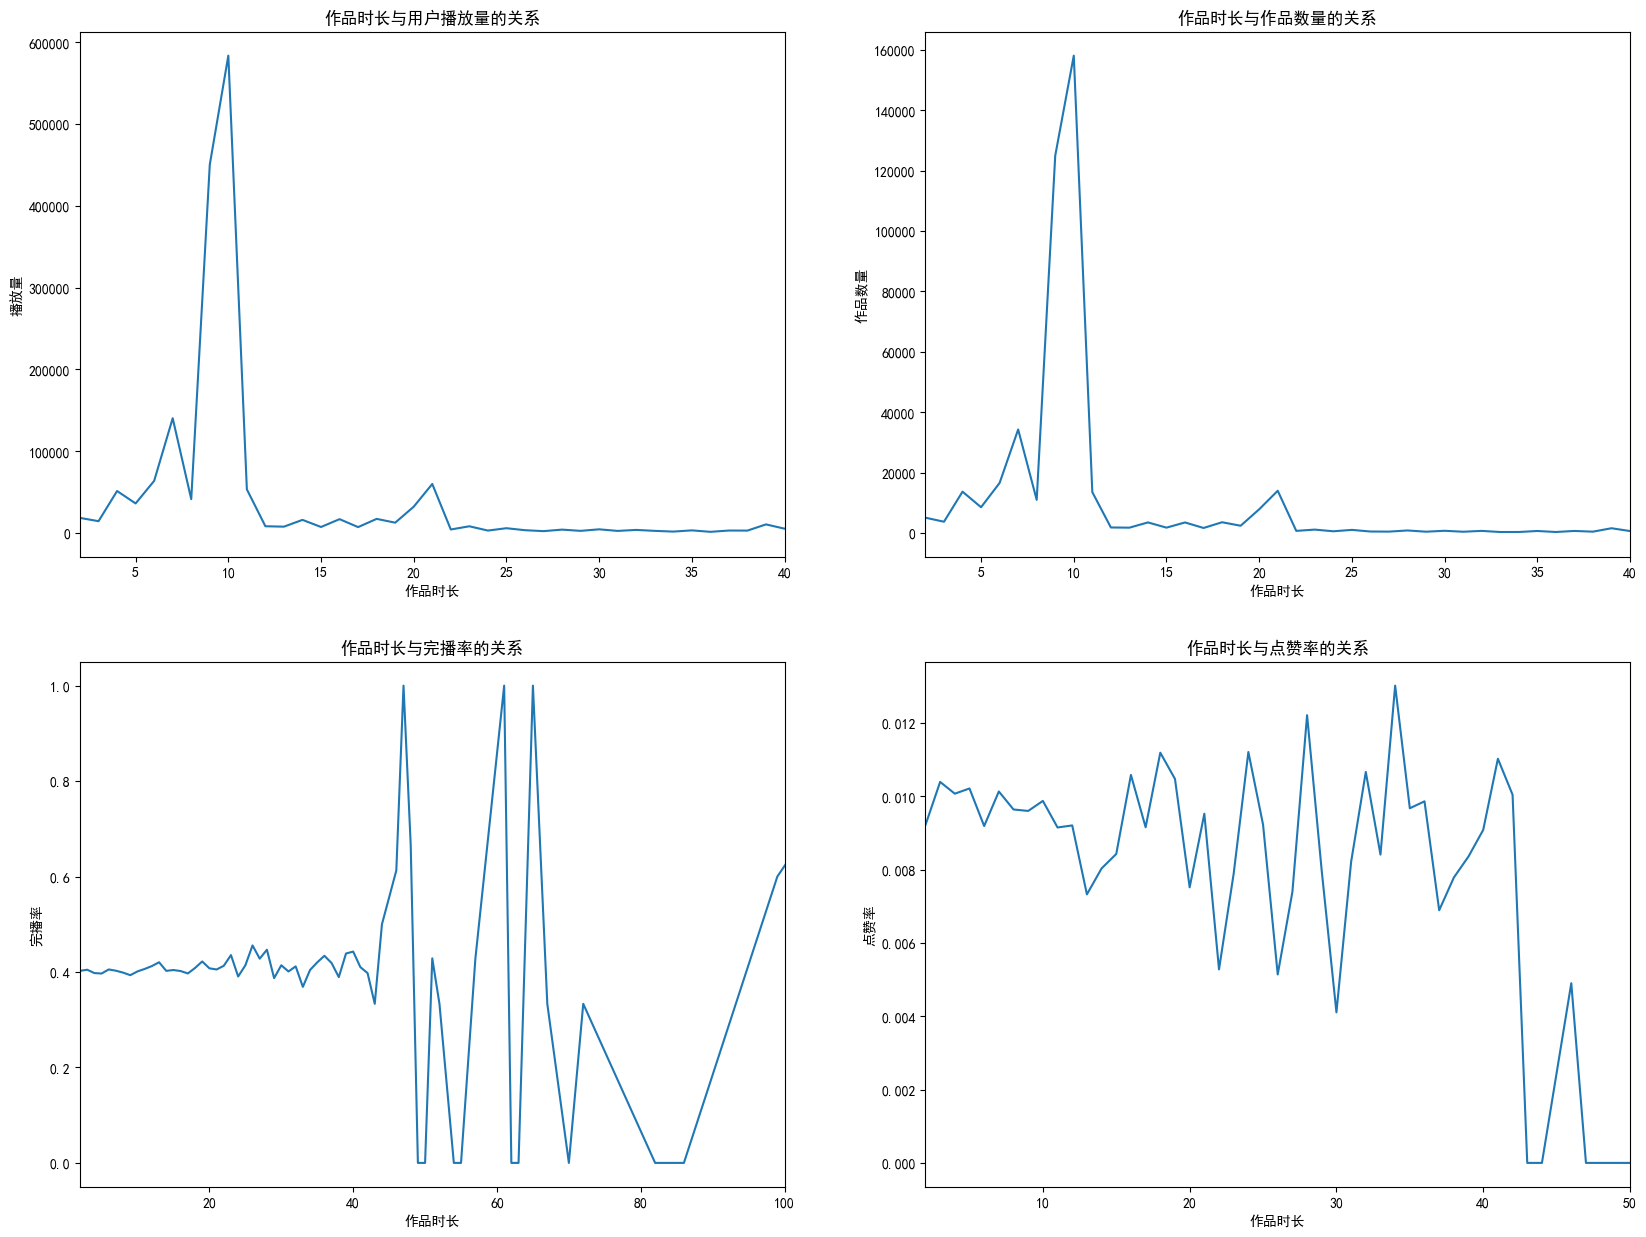

In [24]:
# 2 视频时长（时长-播放数量  /  时长-作品数量  /  时长-完播情况  /  时长-点赞情况）
plt.figure(figsize=(20,15))


# 2-1 时长-播放数量
plt.subplot(221) 
df.groupby(by='duration_time').count()['uid'].plot()
plt.xlim(2,40)
plt.title('作品时长与用户播放量的关系')
plt.xlabel('作品时长')
plt.ylabel('播放量')


# 2-2 时长-作品数量
plt.subplot(222) 
df.groupby(by='duration_time')['item_id'].nunique().plot()  # nunique()返回唯一值的个数   unique()返回唯一值
plt.xlim(2,40)
plt.title('作品时长与作品数量的关系')
plt.xlabel('作品时长')
plt.ylabel('作品数量')


# 2-3 时长-完播情况
plt.subplot(223) 
df.groupby(by='duration_time')['finish'].mean().plot() 
plt.xlim(2,100)
plt.title('作品时长与完播率的关系')
plt.xlabel('作品时长')
plt.ylabel('完播率')


# 2-4 时长-点赞情况
plt.subplot(224) 
df.groupby(by='duration_time')['like'].mean().plot() 
plt.xlim(2,50)
plt.title('作品时长与点赞率的关系')
plt.xlabel('作品时长')
plt.ylabel('点赞率')      

In [25]:
# 结论 2
# 绝大多数的作品时长集中在7-10s内，在10-20s之间也有少部分作品。而作品时长在20s以上则极少有投稿。
# 用户播放量的分布与作品数量的分布基本类似
# 当作品时长在0-40s时，完播率有小幅度波动，但基本稳定在40%左右。当作品时长在40s以上，完播率剧烈波动，差值较大。建议作品时长尽可能稳定在40s内，以获得较为稳定的完播率
# 当作品时长在0-10s时。点赞率有小幅度波动，基本稳定在1%左右。当作品时长在10-20s时，点赞率在0.7%到1.5%之间波动。当作品时长超过20s后，波动剧烈且无法发现规律。点赞率最高值为1.3%l
# 综上所述：视频时长最好在7-10s，其次是0-6s及23s以内，最长也不建议超过40s。

Text(0.5, 1.0, '投稿时间(小时)与作品完播率和点赞率的关系')

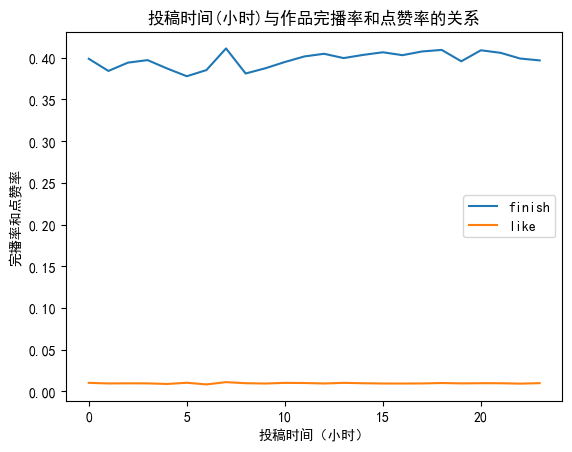

In [49]:
# 1 投稿时间(小时)与作品完播率和点赞率的关系
df.groupby(by='hour')[['finish','like']].mean().plot()
plt.xlabel('投稿时间（小时）')
plt.ylabel('完播率和点赞率')
plt.title('投稿时间(小时)与作品完播率和点赞率的关系')

In [62]:
# df.info()
df['date'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737313 entries, 0 to 1737312
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   uid            int64         
 1   user_city      float64       
 2   item_id        int64         
 3   author_id      int64         
 4   item_city      float64       
 5   channel        int64         
 6   finish         int64         
 7   like           int64         
 8   music_id       float64       
 9   time           datetime64[ns]
 10  duration_time  int64         
 11  hour           int32         
 12  date           object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(7), object(1)
memory usage: 165.7+ MB


Text(0.5, 1.0, '投稿时间(小时)与作品播放量的关系')

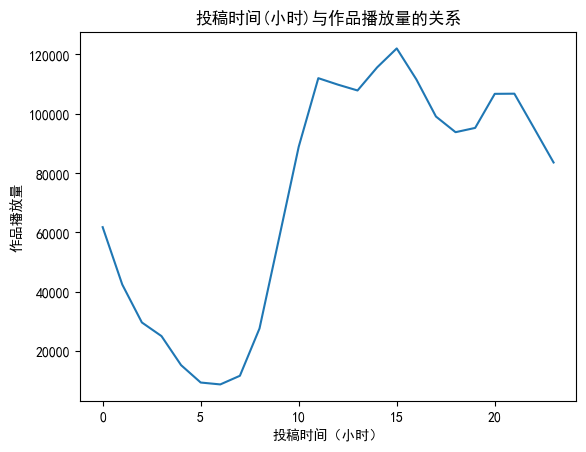

In [50]:
# 2 投稿时间（小时）与作品播放量的关系
df.groupby(by='hour')['uid'].count().plot()
plt.xlabel('投稿时间（小时）')
plt.ylabel('作品播放量')
plt.title('投稿时间(小时)与作品播放量的关系')

Text(0.5, 1.0, '投稿时间(小时)与投稿次数的关系')

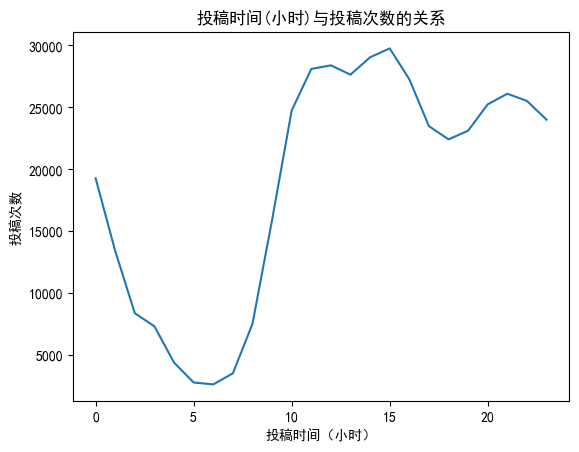

In [57]:
# 3 投稿时间（小时）与投稿数量的关系   ！考虑去重  ！查看哪个时间段投稿的人多
df.groupby(by='hour')['item_id'].nunique().plot()
plt.xlabel('投稿时间（小时）')
plt.ylabel('投稿次数')
plt.title('投稿时间(小时)与投稿次数的关系')

In [ ]:
# 结论 2
# 

In [26]:
# 1 音乐ID被使用在作品中的TOP10
music_id_top = df.groupby(by='music_id')['item_id'].count().sort_values(ascending = False).iloc[:10]
music_id_top    # 热门歌曲ID

music_id
22.0     51627
220.0    41412
25.0     27837
68.0     22365
110.0    21087
33.0     17543
468.0    17179
57.0     13347
43.0     13197
238.0    12563
Name: item_id, dtype: int64

In [27]:
# 2 音乐ID被使用在作品中，用户浏览完作品的情况
music_id_finish = df.groupby(by='music_id')['finish'].sum().sort_values(ascending = False).iloc[:10]
music_id_finish

music_id
22.0     20727
220.0    17573
25.0     10892
110.0     8673
68.0      8507
33.0      7063
468.0     7020
57.0      5643
238.0     5207
43.0      5189
Name: finish, dtype: int64

In [28]:
# 3 音乐ID被使用在作品中，用户点赞作品的情况
music_id_like = df.groupby(by='music_id')['like'].sum().sort_values(ascending = False).iloc[:10]
music_id_like

music_id
22.0     382
220.0    278
25.0     276
68.0     167
110.0    142
468.0    136
419.0    130
678.0    127
43.0     114
33.0     110
Name: like, dtype: int64

Text(0.5, 1.0, 'TOP10音乐的总使用情况及使用该音乐视频完播情况')

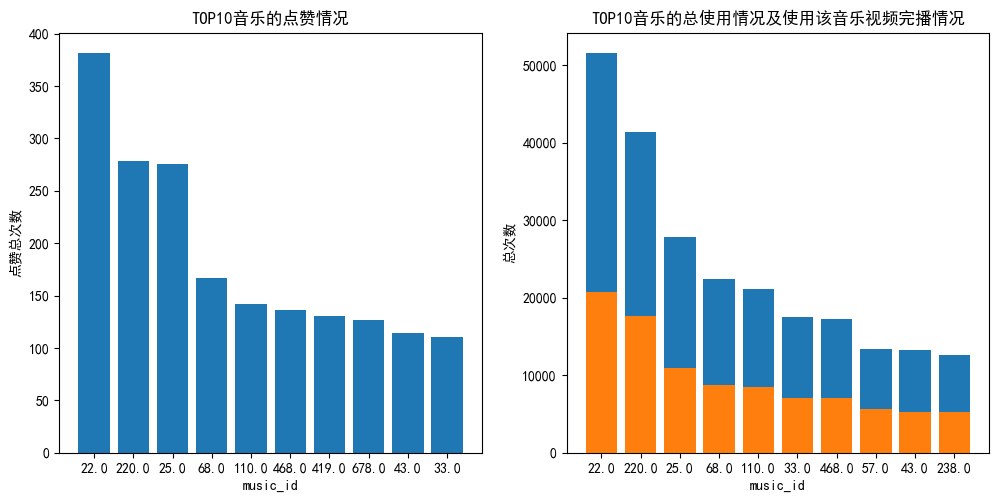

In [42]:
# 绘制柱状图
plt.figure(figsize=(12,12)) 
plt.subplot(221) 
plt.bar(music_id_like.index.astype('str'),music_id_like)
plt.xlabel('music_id')
plt.ylabel('点赞总次数')
plt.title('TOP10音乐的点赞情况')

plt.subplot(222) 
plt.bar(music_id_top.index.astype('str'),music_id_top)
plt.bar(music_id_top.index.astype('str'),music_id_finish)
plt.xlabel('music_id')
plt.ylabel('总次数')
plt.title('TOP10音乐的总使用情况及使用该音乐视频完播情况')

In [ ]:
# 结论 3
# 在作品中使用次数前10的音乐ID其作品浏览完成的情况和作品点赞情况基本也是在前10的。
# 这说明，使用热门的歌曲ID，将提升用户对视频的播放量和点赞量，其完播率和点赞率会更好。
# 综上所述：背景音乐最好选择当下最流行的歌曲。